In [1]:
# Import libraries

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
np.random.seed(24)

In [3]:
def load_data():
    
    df = pd.read_csv("./kdd2004.csv")
    df["target"] = df["target"].map({-1:0,1:1})
    
    return df

In [4]:
def make_class(sep):
    """Will create classes with different degrees of separateness."""

    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_redundant=0,
                               n_classes=2,
                               n_clusters_per_class=1,
                               # The proportions of samples assigned to each class
                               weights=[0.99],
                               # How seperate the classes are
                               class_sep=sep,  
                               random_state=24,
                               )
    X = pd.DataFrame(X, columns=["varA", "varB"])

    y = pd.Series(y)

    return X, y

Explications...

# Random Over-Sampling

In [5]:
from imblearn.over_sampling import RandomOverSampler

In [7]:
X, y = make_class(sep=2)

rov = RandomOverSampler(sampling_strategy='auto',
                         random_state=24
                         )

X_resampled,y_resampled = rov.fit_resample(X,y)

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [12]:
y.value_counts(),y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 0    987
 1    987
 dtype: int64)

In [9]:
X_resampled.shape,y_resampled.shape

((1974, 2), (1974,))

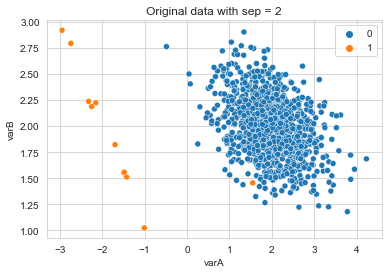

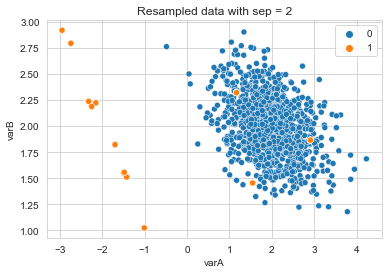

In [13]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [15]:
df = load_data()

In [17]:
X_resampled,y_resampled = rov.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

In [18]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
0    144455
1    144455
Name: target, dtype: int64


In [22]:
X_resampled.shape,y_resampled.shape,df.shape

((288910, 74), (288910,), (145751, 75))

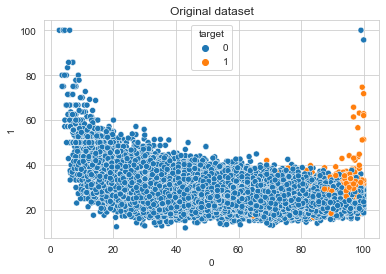

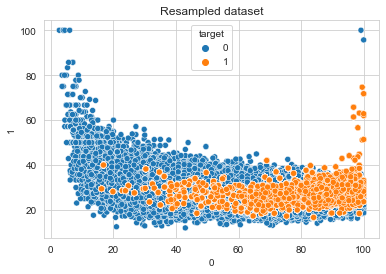

In [23]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [24]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [26]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.9761414267359368
ROC-AUC for the test set: 0.9640441514681941


In [27]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [28]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.9909012847587529
ROC-AUC for the test set: 0.9906494812691237


Increase in performance!

# SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X, y = make_class(sep=2)

smote = SMOTE(sampling_strategy='auto',
            random_state=24,
            k_neighbors=5,
            n_jobs=-1,
            )
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
X.shape,y.shape

((1000, 2), (1000,))

In [32]:
y.value_counts(),y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 0    987
 1    987
 dtype: int64)

In [33]:
X_resampled.shape,y_resampled.shape

((1974, 2), (1974,))

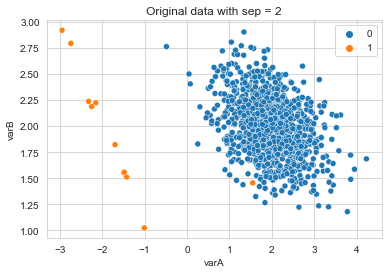

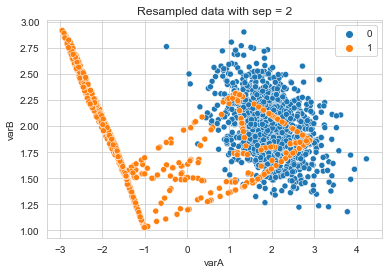

In [34]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [35]:
df = load_data()

In [54]:
X_resampled,y_resampled = smote.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

In [55]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
0    144455
1    144455
Name: target, dtype: int64


In [56]:
X_resampled.shape,y_resampled.shape,df.shape

((288910, 74), (288910,), (145751, 75))

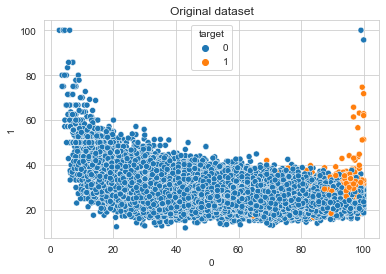

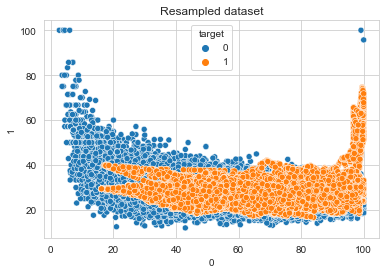

In [57]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [58]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [60]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.9737065582757544
ROC-AUC for the test set: 0.9629927186588553


In [61]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [62]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.9921016372183205
ROC-AUC for the test set: 0.9922829286023825


Huge increase in performance!

# SMOTENC

In [45]:
from imblearn.over_sampling import SMOTENC

In [49]:
X, y = make_class(sep=2)

smotenc = SMOTENC(categorical_features = ["varA","varB"],
                  sampling_strategy='auto',
                  random_state=24,
                  k_neighbors=5,
                  n_jobs=-1,
                  )
X_resampled, y_resampled = smotenc.fit_resample(X, y)

/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/imblearn/over_sampling/_smote.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cat not in np.arange(self.n_features_)


ValueError: Some of the categorical indices are out of range. Indices should be between 0 and 2

In [50]:
X.shape,y.shape

((1000, 2), (1000,))

In [51]:
y.value_counts(),y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 0    987
 1    987
 dtype: int64)

In [52]:
X_resampled.shape,y_resampled.shape

((1974, 2), (1974,))

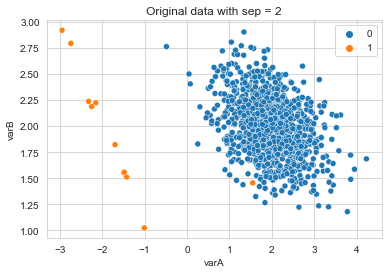

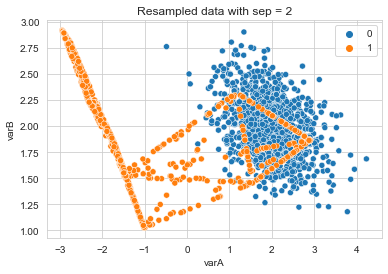

In [53]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [63]:
df = load_data()

In [64]:
X_resampled,y_resampled = smotenc.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

/Users/alexandrecasula/opt/anaconda3/envs/ML/lib/python3.8/site-packages/imblearn/over_sampling/_smote.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cat not in np.arange(self.n_features_)


ValueError: Some of the categorical indices are out of range. Indices should be between 0 and 74

In [65]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
0    144455
1    144455
Name: target, dtype: int64


In [66]:
X_resampled.shape,y_resampled.shape,df.shape

((288910, 74), (288910,), (145751, 75))

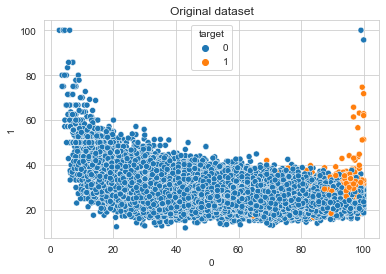

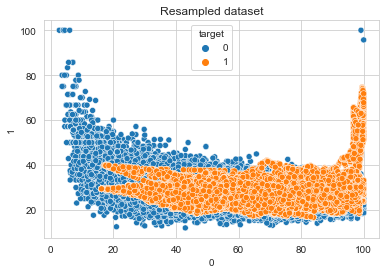

In [67]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [68]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [70]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.976391548824878
ROC-AUC for the test set: 0.9609427875888981


In [71]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [72]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.9922900607647707
ROC-AUC for the test set: 0.9924288071768405


Huge increase in performance!

# ADASYN

In [73]:
from imblearn.over_sampling import ADASYN

In [74]:
X, y = make_class(sep=2)

adasyn = ADASYN(sampling_strategy='auto',
                random_state=24,
                n_neighbors=5,
                n_jobs=-1,
                )
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [75]:
X.shape,y.shape

((1000, 2), (1000,))

In [76]:
y.value_counts(),y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 0    987
 1    986
 dtype: int64)

In [77]:
X_resampled.shape,y_resampled.shape

((1973, 2), (1973,))

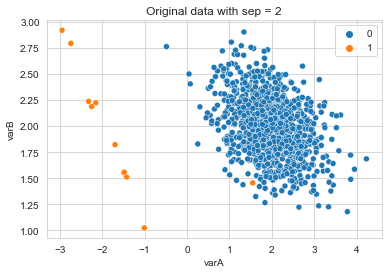

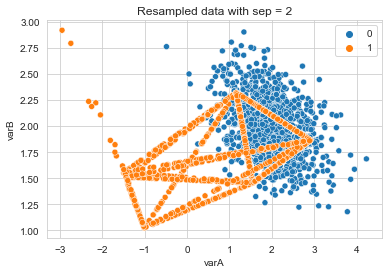

In [78]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [79]:
df = load_data()

In [81]:
X_resampled,y_resampled = adasyn.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

In [82]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
1    144578
0    144455
Name: target, dtype: int64


In [83]:
X_resampled.shape,y_resampled.shape,df.shape

((289033, 74), (289033,), (145751, 75))

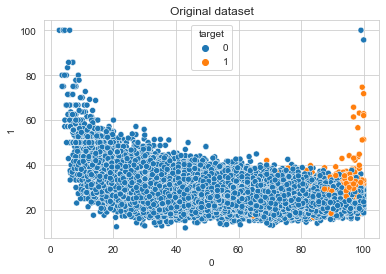

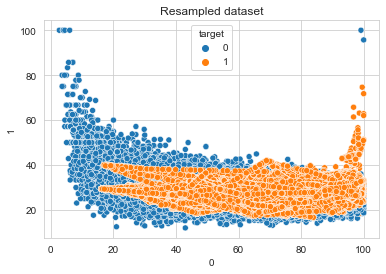

In [84]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [85]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [87]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.9746389857583169
ROC-AUC for the test set: 0.9644665015909647


In [88]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [89]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.9888362332434242
ROC-AUC for the test set: 0.9888462785271


Increase in performance!

# Bordeline SMOTE

In [90]:
from imblearn.over_sampling import BorderlineSMOTE

In [91]:
X, y = make_class(sep=2)

bsmote = BorderlineSMOTE(sampling_strategy='auto',
                         random_state=24,
                         k_neighbors=5,
                         n_jobs=-1,
                         m_neighbors=10,
                         kind='borderline-1',
                         )
X_resampled, y_resampled = bsmote.fit_resample(X, y)

In [92]:
X.shape,y.shape

((1000, 2), (1000,))

In [93]:
y.value_counts(),y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 0    987
 1     13
 dtype: int64)

In [94]:
X_resampled.shape,y_resampled.shape

((1000, 2), (1000,))

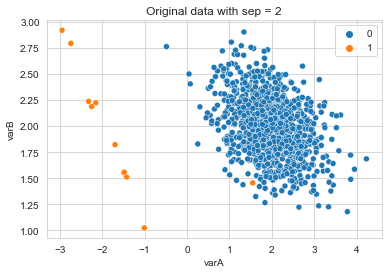

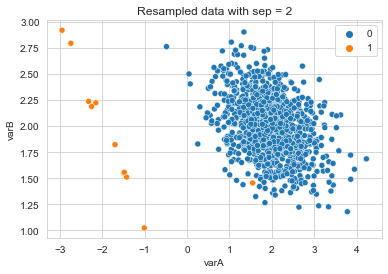

In [95]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [96]:
df = load_data()

In [97]:
X_resampled,y_resampled = adasyn.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

In [98]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
1    144578
0    144455
Name: target, dtype: int64


In [99]:
X_resampled.shape,y_resampled.shape,df.shape

((289033, 74), (289033,), (145751, 75))

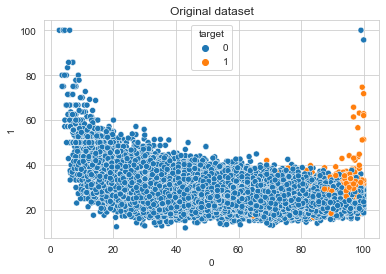

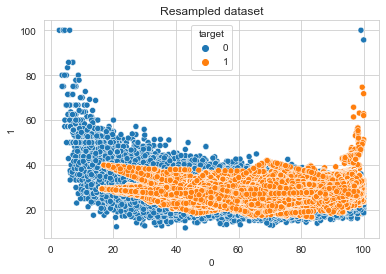

In [100]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [101]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [103]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.9736980042735137
ROC-AUC for the test set: 0.9595632606901132


In [104]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [105]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.9888197156367546
ROC-AUC for the test set: 0.9887950754475987


Increase in performance!

# SVM SMOTE

In [106]:
from imblearn.over_sampling import SVMSMOTE

In [107]:
X, y = make_class(sep=2)

svmsmote = SVMSMOTE(sampling_strategy='auto',
                    random_state=24,
                    k_neighbors=5,
                    n_jobs=-1,
                    m_neighbors=10,
                    svm_estimator=None,
                    out_step=0.5,
                    )
X_resampled, y_resampled = svmsmote.fit_resample(X, y)

In [108]:
X.shape,y.shape

((1000, 2), (1000,))

In [109]:
y.value_counts(),y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 0    987
 1    345
 dtype: int64)

In [110]:
X_resampled.shape,y_resampled.shape

((1332, 2), (1332,))

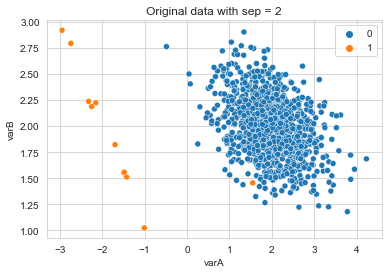

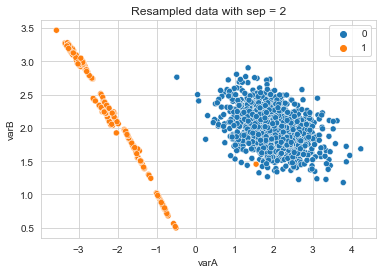

In [111]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [112]:
df = load_data()

In [113]:
X_resampled,y_resampled = adasyn.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

In [114]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
1    144578
0    144455
Name: target, dtype: int64


In [115]:
X_resampled.shape,y_resampled.shape,df.shape

((289033, 74), (289033,), (145751, 75))

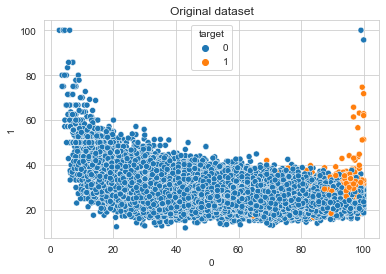

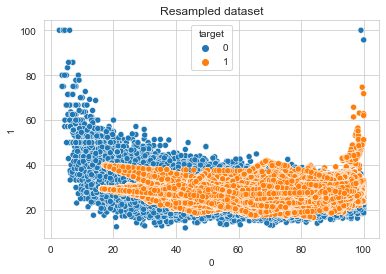

In [116]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [117]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [119]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.9767588053673701
ROC-AUC for the test set: 0.9663650623769209


In [120]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [121]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.988650258412739
ROC-AUC for the test set: 0.9886097729694469


Improvement!

# K-Means SMOTE

In [122]:
from imblearn.over_sampling import KMeansSMOTE

In [123]:
X, y = make_class(sep=2)

svmsmote = KMeansSMOTE(sampling_strategy='auto',
                       random_state=24,
                       k_neighbors=2,
                       n_jobs=-1,
                       kmeans_estimator=None,
                       cluster_balance_threshold='auto',
                       density_exponent='auto',
                       )
X_resampled, y_resampled = svmsmote.fit_resample(X, y)

In [124]:
X.shape, y.shape

((1000, 2), (1000,))

In [125]:
y.value_counts(), y_resampled.value_counts()

(0    987
 1     13
 dtype: int64,
 1    988
 0    987
 dtype: int64)

In [126]:
X_resampled.shape, y_resampled.shape

((1975, 2), (1975,))

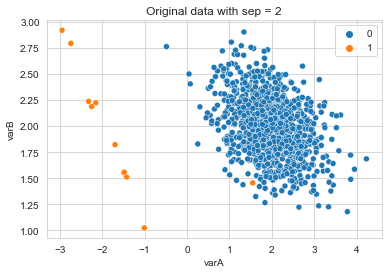

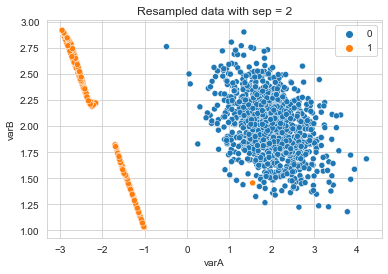

In [127]:
sns.scatterplot(data=X, x="varA", y="varB", hue=y)

plt.title(f"Original data with sep = 2")
plt.show()

sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)

plt.title(f"Resampled data with sep = 2")
plt.show()

In [128]:
df = load_data()

In [129]:
X_resampled,y_resampled = adasyn.fit_resample(df.drop(labels=["target"],axis=1),df["target"])

In [130]:
print(f"Before resampling:")
print(f"{df['target'].value_counts()}")
print(f"After resampling:")
print(f"{y_resampled.value_counts()}")

Before resampling:
0    144455
1      1296
Name: target, dtype: int64
After resampling:
1    144578
0    144455
Name: target, dtype: int64


In [131]:
X_resampled.shape,y_resampled.shape,df.shape

((289033, 74), (289033,), (145751, 75))

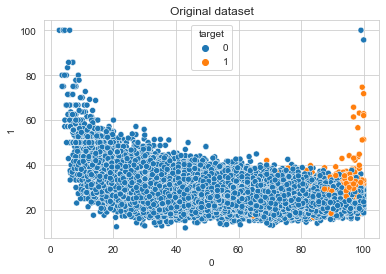

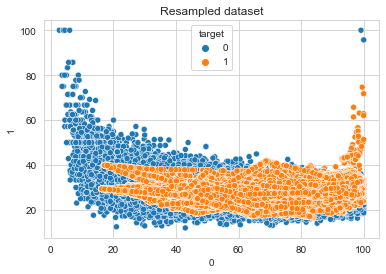

In [132]:
sns.scatterplot(data=df, x="0", y="1", hue="target")

plt.title(f"Original dataset")
plt.show()
sns.scatterplot(data=X_resampled, x="0", y="1", hue=y_resampled)

plt.title(f"Resampled dataset")
plt.show()

In [133]:
def run_rf(X_train,X_test,y_train,y_test):
    
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_test)[:,1]
    
    print(f"ROC-AUC for the train set: {roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
    print(f"ROC-AUC for the test set: {roc_auc_score(y_test,y_pred)}")

In [134]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"],axis=1),df["target"],test_size=0.33, random_state=24)

In [135]:
run_rf(X_train, X_test, y_train, y_test)

ROC-AUC for the train set: 0.9761673656284071
ROC-AUC for the test set: 0.967553699534291


In [136]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,y_resampled,test_size=0.33, random_state=24)

In [137]:
run_rf(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

ROC-AUC for the train set: 0.9884351791360735
ROC-AUC for the test set: 0.989075147228403


Better improvement!